<style>
div.cell, div.text_cell_render{
  max-width:750px;
  margin-left:auto;
  margin-right:auto;
}

.rendered_html
{
  font-size: 140%;
  }

.rendered_html li
{
  line-height: 1.8;
  }

.rendered_html h1, h2 {
  text-align:center;
  font-familly:"Charis SIL", serif;
}

.input_prompt, .CodeMirror-lines, .output_area
{
  font-family: Consolas;
  font-size: 110%;
  }
</style>

<small><i>This notebook was put together by [Jake Vanderplas](http://www.vanderplas.com) for UW's [Astro 599](http://www.astro.washington.edu/users/vanderplas/Astr599/) course. Source and license info is on [GitHub](https://github.com/jakevdp/2013_fall_ASTR599/).</i></small>

# Introduction to matplotlib

The [matplotlib](http://matplotlib.org) library is a powerful tool capable of producing complex publication-quality figures with fine layout control in two and three dimensions; here we will only provide a minimal self-contained introduction to its usage that covers the functionality needed for the rest of the book.  We encourage the reader to read the tutorials included with the matplotlib documentation as well as to browse its extensive gallery of examples that include source code.

Just as we typically use the shorthand `np` for Numpy, we will use `plt` for the `matplotlib.pyplot` module where the easy-to-use plotting functions reside (the library contains a rich object-oriented architecture that we don't have the space to discuss here):

In [1]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


### The `plot` command:

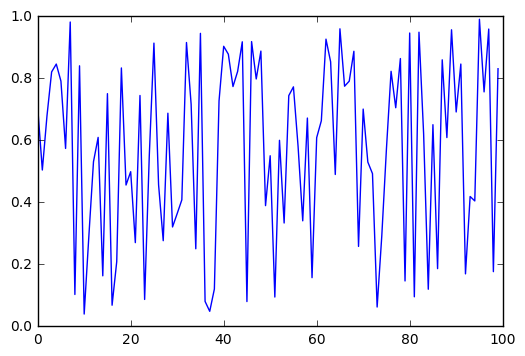

In [2]:
plt.plot(np.random.rand(100))

### Plotting a function: $f(x) = \sin(x)$

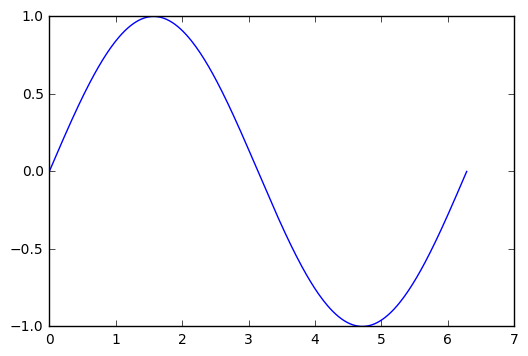

In [3]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x)
plt.plot(x, y)

### Titles, labels, etc.

The most frequently used function is simply called `plot`, here is how you can make a simple plot of $\sin(x)$ and $\sin(x^2)$ for $x \in [0, 2\pi]$ with labels and a grid (we use the semicolon in the last line to suppress the display of some information that is unnecessary right now):

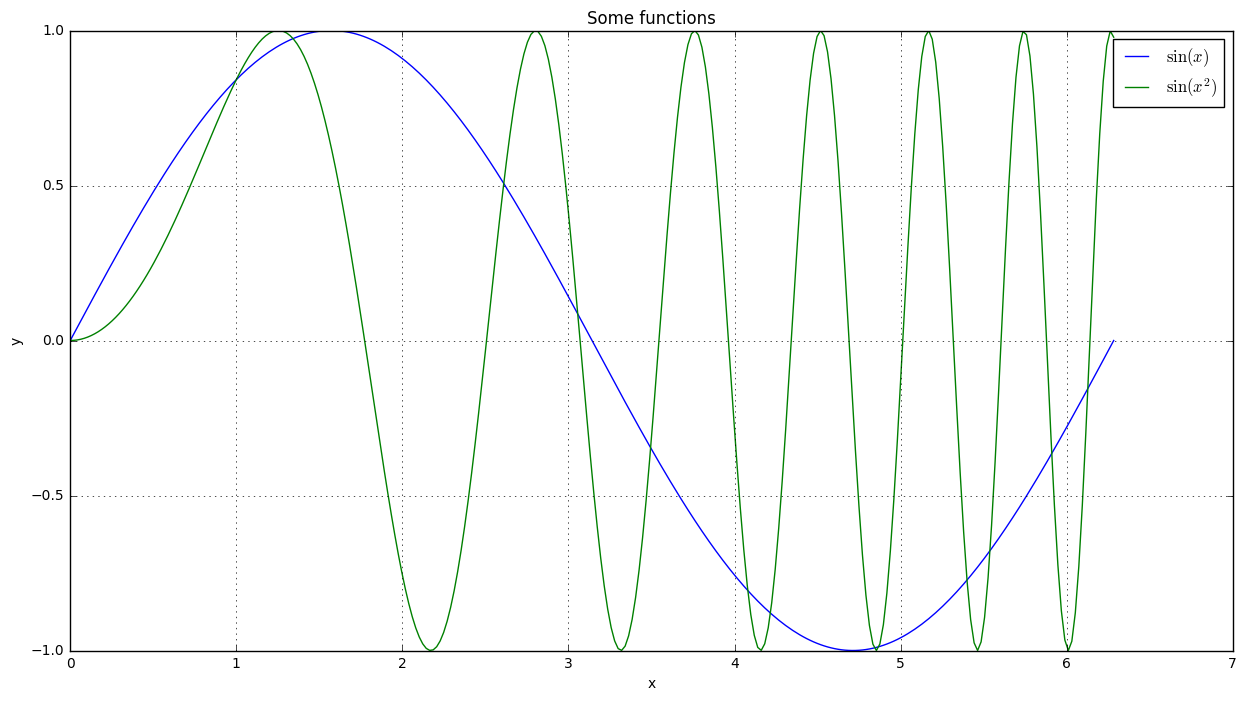

In [6]:
y2 = np.sin(x**2)

plt.figure(figsize=(15,8))
plt.plot(x, y, label=r'$\sin(x)$') #uses LaTeX
plt.plot(x, y2, label=r'$\sin(x^2)$')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

### Controlling lines and markers

You can control the style, color and other properties of the markers, for example:

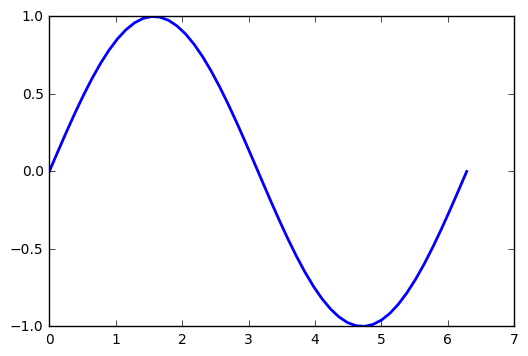

In [7]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
plt.plot(x, y, linewidth=2);

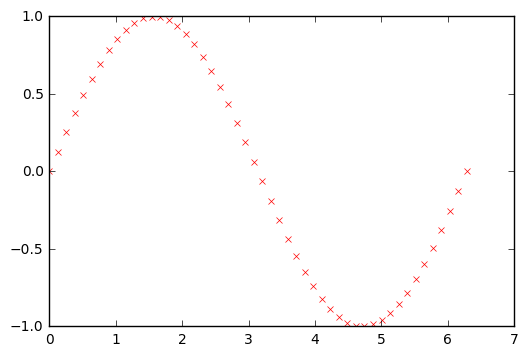

In [8]:
plt.plot(x, y, 'x', markersize=5, color='r');

## Other plot types

### Errorbars

We will now see how to create a few other common plot types, such as a simple error plot:

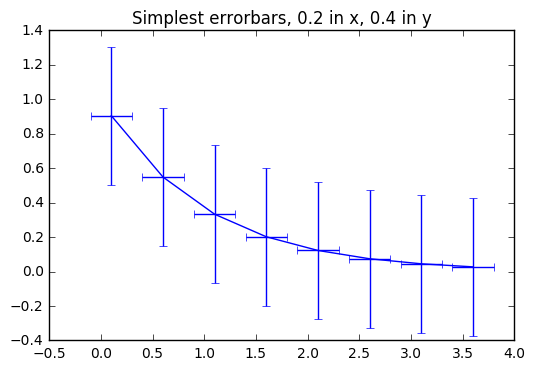

In [9]:
# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.title("Simplest errorbars, 0.2 in x, 0.4 in y");

### Log plot

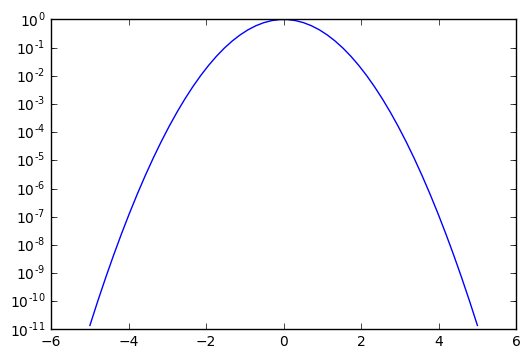

In [10]:
x = np.linspace(-5, 5)
y = np.exp(-x**2)
plt.semilogy(x, y);

### Histogram

A histogram annotated with text inside the plot, using the `text` function:

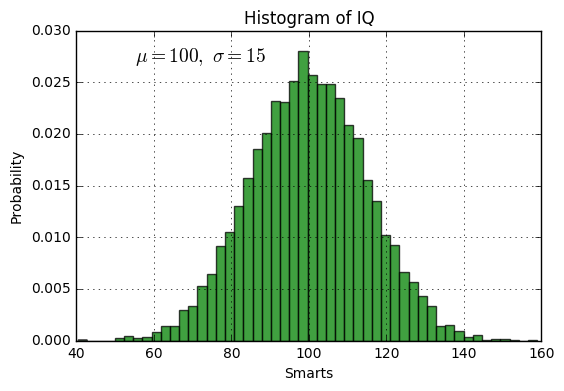

In [11]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
# This will put a text fragment at the position given:
plt.text(55, .027, r'$\mu=100,\ \sigma=15$', fontsize=14)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

In [15]:
patches

<a list of 50 Patch objects>

### Plotting two-dimensional arrays

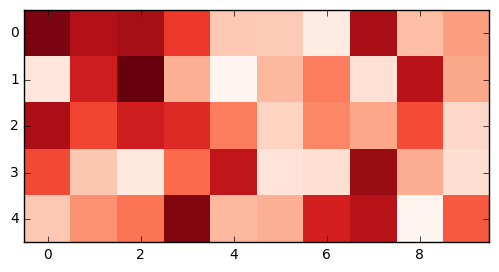

In [20]:
plt.imshow(rand(5,10), interpolation='nearest', cmap=cm.Reds)

In [17]:
img = plt.imread('2010yoav2.png')
img.shape

(114, 94, 4)

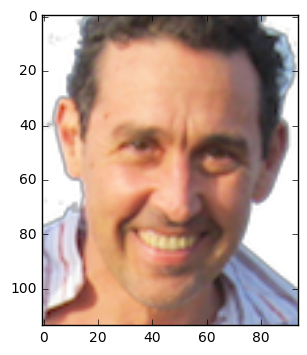

In [18]:
plt.imshow(img)

### Subplots
Plot the r, g, b channels of the image.

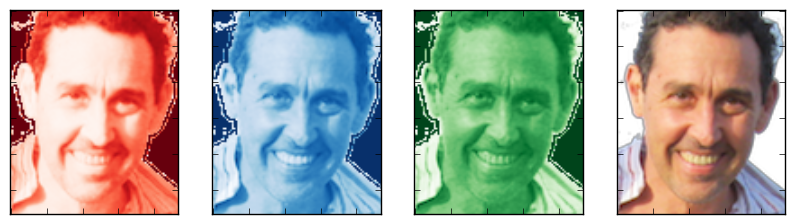

In [21]:
fig, ax = plt.subplots(1,4, figsize=(10,6))
ax[0].imshow(img[:,:,0], cmap=cm.Reds_r)
ax[1].imshow(img[:,:,1], cmap=cm.Blues_r)
ax[2].imshow(img[:,:,2], cmap=cm.Greens_r)
ax[3].imshow(img);
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])

## Simple 3d plotting with matplotlib
For 3D plots, you must execute at least once in your session:

In [22]:
from mpl_toolkits.mplot3d import Axes3D

One this has been done, you can create 3d axes with the `projection='3d'` keyword to `add_subplot`:

    fig = plt.figure()
    fig.add_subplot(...,
                    projection='3d')

Here is a simple 3D surface plot:

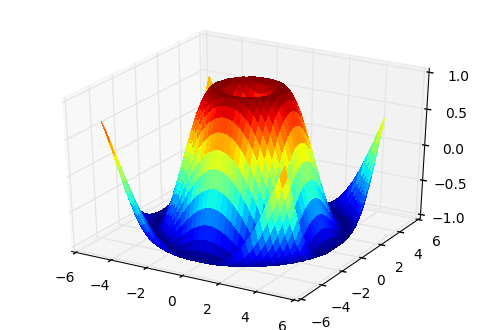

In [23]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01);

## The [matplotlib gallery](http://matplotlib.sourceforge.net/gallery.html)

You can load code from the gallery using the URL, and then try it out:

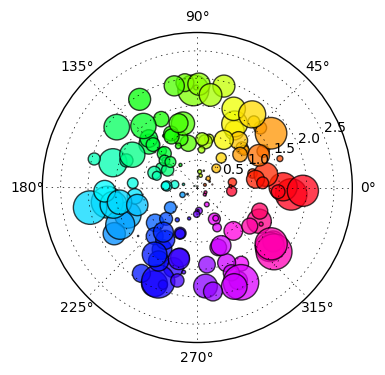

In [25]:
# %load http://matplotlib.org/mpl_examples/pie_and_polar_charts/polar_scatter_demo.py
"""
Demo of scatter plot on a polar axis.

Size increases radially in this example and color increases with angle (just to
verify the symbols are being scattered correctly).
"""
import numpy as np
import matplotlib.pyplot as plt


N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2 * np.random.rand(N)
colors = theta

ax = plt.subplot(111, projection='polar')
c = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(0.75)

plt.show()
